In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import libem
import numpy as np
from libvis import Visualizations
import matplotlib.pyplot as plt

from components import *

In [13]:
sim = libem.EMSimulationSpace3D(space_size=(1, 1, 1), top_left=(-0.5, -0.5, -0.5), scale=20)
sim.compute(make_enforcer(
    enf(EMObjects.rectangular_prism_solid, (-0.45, -0.45, -0.45), (0.1, 0.9, 0.9), 1),
    enf(EMObjects.rectangular_prism_solid, (0.35, -0.45, -0.45), (0.1, 0.9, 0.9), -1)
))
sim.get_efield()
print("Done.")

Done.


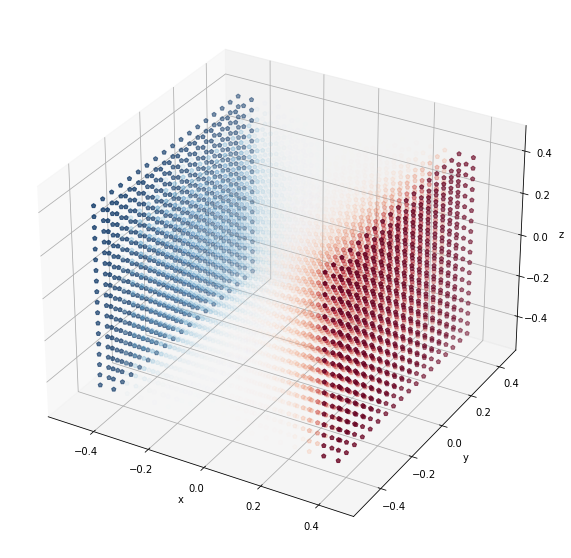

In [14]:
Visualizations.colormesh_3d(sim, resolution=1)

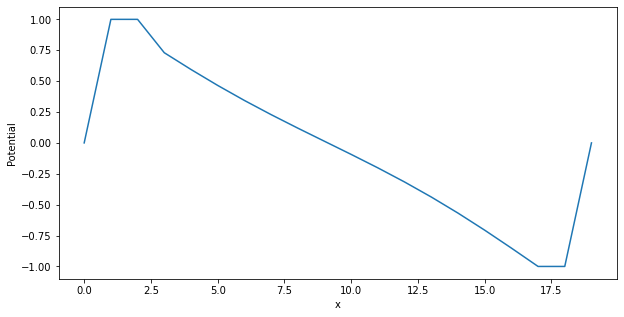

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 20), sim.V[:,10,10])
plt.xlabel("x")
plt.ylabel("Potential")
plt.show()